In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("wine.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [5]:
df.isna().sum().sum()

0

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [7]:
df.quality.unique()

array(['bad', 'good'], dtype=object)

In [8]:
X = df.drop("quality",axis=1).to_numpy()
Y = np.where(df['quality']=='good',1,0)

In [9]:
X.shape,Y.shape

((1599, 11), (1599,))

In [10]:
(((X-X.mean(axis=0))[:,0])/X.std(axis=0)[0] == (X[:,0]-X[:,0].mean())/X[:,0].std()).sum() == X.shape[0]

True

In [11]:
def scaler(X):
    return (X-X.mean(axis=0))/X.std(axis=0)

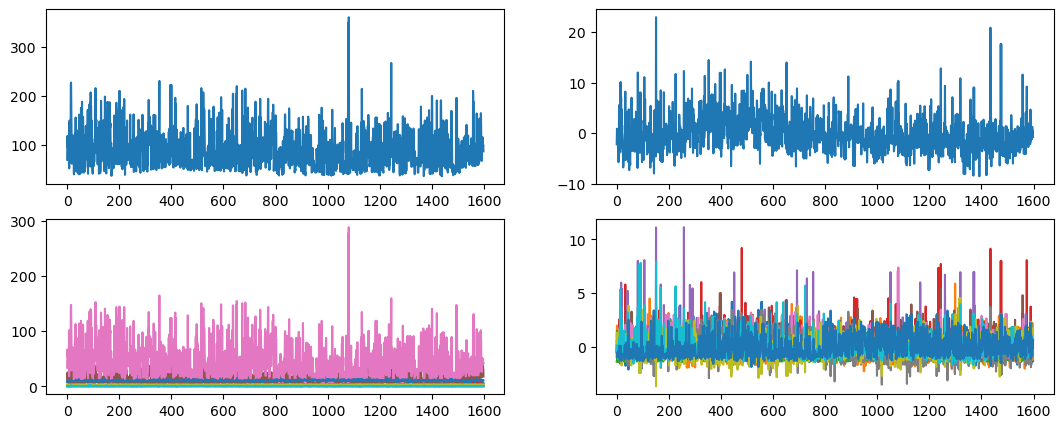

In [12]:
fig,ax = plt.subplots(2,2)
fig.set_figwidth(13)
fig.set_figheight(5)

p1 = ax[0][0]
p2 = ax[0][1]
p3 = ax[1][0]
p4 = ax[1][1]

p1.plot(X.sum(axis=1))
p2.plot(scaler(X).sum(axis=1))
p3.plot(X)
p4.plot(scaler(X))

# plt.plot(X.sum(axis=1))

plt.show()

In [13]:
X_S = scaler(X)

X_train,X_test,Y_train,Y_test = train_test_split(X_S,Y,test_size=0.2,random_state=100)

In [14]:
X_train.shape,Y_train.shape

((1279, 11), (1279,))

In [24]:
class KNN:
    
    def __init__(self,k=5):
        
        self.k = k
        
    def fit(self,input_data,target):
        
        self.X = input_data
        self.Y = target
        
    def set_new_k(self,k):
        self.k = k
        
    def metric(self,x1,x2):
        
        return np.sum((x1 - x2)**2)
        
        
    def predict(self,X):
        return np.array([self._predict(x) for x in X])
    
    def _predict(self,input_data):
        
        distances = [self.metric(input_data,i) for i in self.X]
        
        minn = np.argsort(distances)[:self.k]
        labels = [self.Y[i] for i in minn]
        
        mst_common = Counter(labels).most_common(1)
        
        return mst_common[0][0]
    
    
#     validation

#     def validate(self,split_ = 5):
        
# #         self.performace_over_validation = {}
#         mean_accuracy = []
#         list_k = []
        
#         accuracy = 0
#         best_k = 1
        
#         for k in range(1,int(np.sqrt(self.X.shape[0]))):
            
#             X_train,X_test,Y_train,Y_test = train_test_split(self.X,self.Y,test_size=0.2)
            
#             accuracies = []
            
#             for i in range(split_):

#                 model = KNN(k)
#                 model.fit(X_train,Y_train)
                
#                 prediction = model.predict(X_test)
                
#                 _accuracy = model.accuracy(prediction,Y_test)
#                 accuracies.append(_accuracy)
            
#             mean_accuracy.append(np.mean(accuracies))
#             list_k.append(k)
            
#             if np.mean(accuracies) > accuracy:
#                 best_k = k
                
#         return mean_accuracy,list_k,best_k

    def validate(self):
        
        k_list = []
        mean_accuraccies = []
        mean_f1 = []
        
        for k in range(1,30):

            X_train,X_test,Y_train,Y_test = train_test_split(self.X,self.Y,test_size = 0.2)
           
            accuraccies = []
            f1 = []
            
            for j in range(10):

                model = KNN(k)
                model.fit(X_train,Y_train)
#                 print(model)
#                 print(X_test)
                predicted = model.predict(X_test)
    
                accuraccies.append(self.accuracy(predicted,Y_test))
                f1.append(self.f1_score(predicted,Y_test))
            
            
            k_list.append(k)
            mean_accuraccies.append(np.mean(accuraccies))
            mean_f1.append(np.mean(f1))
            
        return np.array(k_list),np.array(mean_accuraccies),np.array(mean_f1)

                
    
#     accuracy metrics

    def accuracy(self,prediction,real):
        return round(100*(prediction == real).sum()/prediction.shape[0])
    
    def precision(self,prediction,real):
        TruePositive = np.where((prediction == 1) & (real == 1),1,0).sum()
        FalsePositive = np.where((prediction == 1) & (real == 0),1,0).sum()
        
        prec = round(100*TruePositive/(TruePositive + FalsePositive))
        
        return prec
        
    def sensitivity(self,prediction,real):
        
        TruePositive = np.where((prediction == 1) & (real == 1),1,0).sum()
        FalseNegative = np.where((prediction == 0) & (real == 1),1,0).sum()
        
        rec = round(100*TruePositive/(TruePositive + FalseNegative))
        
        return rec
        
        
    def specificity(self,prediction,real):
        
        TrueNegative = np.where((prediction == 0) & (real == 0),1,0).sum()
        FalseNegative = np.where((prediction == 1) & (real == 0),1,0).sum()
        
        trn = round(100*TrueNegative/(TrueNegative+FalseNegative))
        
        return trn
    
    def FalseNegativeRate(self,prediction,real):
        
        FalseNegative = np.where((prediction == 0) & (real == 1),1,0).sum()
        TruePositive = np.where((prediction == 1) & (real == 1),1,0).sum()
        
        fnr = round(100 * FalseNegative/(FalseNegative + TruePositive))
        return fnr
    
    def FalsePositiveRate(self,prediction,real):
        
        FalsePositive = np.where((prediction == 1) & (real == 0),1,0).sum()
        TrueNegative = np.where((prediction == 0) & (real == 0),1,0).sum()
        
        fpr = round(100*FalsePositive/(FalsePositive + TrueNegative))
        
        return fpr
    
    def f1_score(self,prediction,real):
        
        TruePositive = np.where((prediction == 1) & (real == 1),1,0).sum()
        FalseNegative = np.where((prediction == 0) & (real == 1),1,0).sum()
        FalsePositive = np.where((prediction == 1) & (real == 0),1,0).sum()
        
        rec =  TruePositive/(TruePositive + FalseNegative)
        prec = TruePositive/(TruePositive + FalsePositive)
        
        f1 = round(100 * (2*prec*rec)/(prec+rec)) 
        
        return f1
    
    def class_performace_measures(self,predicition,real):
        
#         TruePositive = np.where((prediction == 1) & (real == 1),1,0).sum()
#         FalsePositive = np.where((prediction == 1) & (real == 0),1,0).sum()
        
#         TrueNegative = np.where((prediction == 0) & (real == 0),1,0).sum()
#         FalseNegative = np.where((prediction == 0) & (real == 1),1,0).sum()
        
#         acc = round(100 * (TruePositive + TrueNegative)/(TruePositive + TrueNegative + FalsePositive + FalseNegative))

        performance_measures ={"accuracy" : self.accuracy(prediction,real),
                            "precision" : self.precision(prediction,real),
                            "sensitivity" : self.sensitivity(prediction,real),
                            "specificity" : self.specificity(prediction,real),
                            "false_negative_rate" : self.FalseNegativeRate(prediction,real),
                            "false_positive_rate" : self.FalsePositiveRate(prediction,real),
                            "f1_score" : self.f1_score(prediction,real)}

        return performance_measures
    

In [25]:
model = KNN(5)
model.fit(X_train,Y_train)
prediction = model.predict(X_test)

In [26]:
k_list,accuracies = model.validate()

In [66]:
best_k = k_list[np.argmax(accuracies)]
max_accuracy = np.max(accuracies)
best_k, max_accuracy

(5, 78.0)

Text(0.5, 0, 'K')

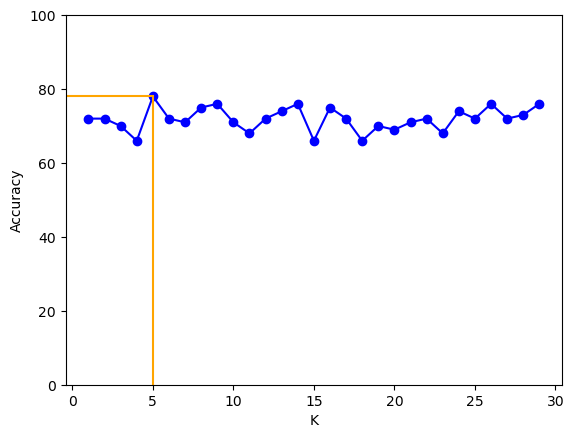

In [76]:
plt.plot(k_list,accuracies,color='blue',marker='o')
plt.axvline(x=best_k,ymin=0,ymax=max_accuracy/100,color='orange')
plt.axhline(y=max_accuracy,xmin=0,xmax=best_k/29,color='orange')
plt.ylim(0,100)


plt.ylabel("Accuracy")
plt.xlabel("K")

In [50]:
model = KNN(best_k)
model.fit(X_train,Y_train)
prediction = model.predict(X_test)

In [51]:
accuracy = model.accuracy(prediction,Y_test)
accuracy

75

In [52]:
precision = model.precision(prediction,Y_test)
precision

74

In [53]:
specificity = model.sensitivity(prediction,Y_test)
specificity

81

In [54]:
specificity = model.specificity(prediction,Y_test)
specificity

68

In [55]:
FalseNegativeRate = model.FalseNegativeRate(prediction,Y_test)
FalseNegativeRate

19

In [56]:
FalsePositiveRate = model.FalsePositiveRate(prediction,Y_test)
FalsePositiveRate

32

In [57]:
confusion_matrix(Y_test,prediction)

array([[100,  48],
       [ 33, 139]], dtype=int64)

In [58]:
f1 = model.f1_score(prediction,Y_test)
f1

77

In [61]:
p_m = model.class_performace_measures(prediction,Y_test)
p_m

{'accuracy': 75,
 'precision': 74,
 'sensitivity': 81,
 'specificity': 68,
 'false_negative_rate': 19,
 'false_positive_rate': 32,
 'f1_score': 77}

In [62]:
pd.DataFrame(p_m.values())

,0
0,75
1,74
2,81
3,68
4,19
5,32
6,77


In [63]:
list(p_m.keys())

['accuracy',
 'precision',
 'sensitivity',
 'specificity',
 'false_negative_rate',
 'false_positive_rate',
 'f1_score']

In [64]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       148
           1       0.74      0.81      0.77       172

    accuracy                           0.75       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.75      0.75       320

